In [14]:
# 
import json
import cv2
import requests
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.bda.v20200324 import bda_client
from tencentcloud.bda.v20200324 import models as bda_models

import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [12]:
"""
https://console.cloud.tencent.com/api
/explorer?Product=bda&Version=2020-03-24&Action=SegmentPortraitPic&SignVersion=
人像分割
"""

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "bda.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = bda_client.BdaClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/人像分割.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = bda_models.SegmentPortraitPicRequest()
    params = {
         "Image": str(img, encoding='utf-8'),
#         "Url": "https://img1.baidu.com/it/u=2975366882,4161670803&fm=26&fmt=auto&gp=0.jpg"
    }
    req.from_json_string(json.dumps(params))

    resp = client.SegmentPortraitPic(req).to_json_string() 
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ResultImage': 'iVBORw0KGgoAAAANSUhEUgAAAfQAAAGyCAYAAAAS1zb7AAAgAElEQVR4AezB25Nl93nf58/3XWt3T88MziRBSiRNibIlRXEkp+SU7YoTp3Thyl+di9zkNlWqSE5MiRRBEgBJzKHPe6/f+8msbmxM92AwGBxJynye/O3/9X+wp7JSWbVNj6am4uDggKkmRg9sWal079jtFpaxoNIDLi8vWR3dPeJgPiQJq2naAMWyDC4uLugezIcHzNNMElblxCopnmfiNivsjTFQUTGg0ooKU5GEaSqSoqpYxYU9FZWqYp6KaZ54qlmprLR5nqRYJeGTVEISkkBJEpKQFElYqWjT3diismoX9iph3mzYbDZM08Q8zcDgJpVlDMaysIxB92CvamKzmZnnDZvNhqpiquImlVUrKt2N3ai0opKEzWZDVTFVkSo6UFV0NycnJ0jx6quvMm82jGVhux2MsfDg8SPOz8959+fv8c4773ByesI0HXBxseXRo0d8481vcXh4yPHJCYeHh/zJn/wJ/+k//Sfuv/oq5yenHB0dcSXhSoUrVdwke8VNIrcYniuyinxosAp7gvCrd9/jl7/8JYeHG7oHy3bh4uKCe6/c4+LigjZUQk0zP/zhD7nzyivQA8ITQSZWhmuGF4rcNlgN9mSiCU1Y2J4/Zpyfc3lywu7inE02JGHKRBIePnhAj/7fl7F7o7u///Of//yvxrL84W65fHss487Z6cnm4uKC0+PzcX5xuUAt8zS72dSYZnzttXuXb7716sO33/7Gg1fefOsf51fe+n/uv/bN//OVV177LzBDDsEJCCBsAssFXF6w3Z5z/PghKtBcXl7SLiSSiMonSUISpmlDEqqKVRJWSbG6d+8Oh0dHrC7Pzzk/O+P45ISLi3OSggz2krDa7Rbu37/HN7/5TaZsePDgAScnJ3Q3WNiyUkkHlT1t9rplpfJpnMIqCVeqSMI0FdM0s9nMVE289fobLGO

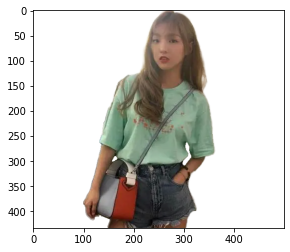

In [13]:
# 无背景图
with open("./images/人像分割-无背景图.jpg","wb") as file:
    file.write(base64.b64decode(resp['ResultImage']))
face=plt.imread("./images/人像分割-无背景图.jpg")
plt.imshow(face)  

In [ ]:
"""
https://console.cloud.tencent.com/api
/explorer?Product=bda&Version=2020-03-24&Action=SegmentCustomizedPortraitPic&SignVersion=
自定义人像分割
"""

In [21]:
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "bda.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = bda_client.BdaClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/人像分割.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = bda_models.SegmentCustomizedPortraitPicRequest()
    params = {
        "Image": str(img, encoding='utf-8'),
#         "Url": "",
        "SegmentationOptions": {
            "Background": True,
            "Hair": False,
            "LeftEyebrow": False,
            "RightEyebrow": False,
            "LeftEye": False,
            "RightEye": False,
            "Nose": False,
            "UpperLip": False,
            "LowerLip": False,
            "Tooth": False,
            "Mouth": False,
            "LeftEar": False,
            "RightEar": False,
            "Face": False,
            "Head": False,
            "Body": False,
            "Hat": False,
            "Headdress": False,
            "Earrings": False,
            "Necklace": False,
            "Belongings": False
        }
    }
    req.from_json_string(json.dumps(params))

    resp = client.SegmentCustomizedPortraitPic(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'PortraitImage': 'iVBORw0KGgoAAAANSUhEUgAAAfQAAAGyCAYAAAAS1zb7AAAgAElEQVR4AYzB25Nk15ne59/7rbXzUKfuBgiCAMfh4WBsRXgUYUdQF46wL/iPU7qjdE0pbI1Eh2UNSKLZQFcfqip37r3W95qrGklkQSBGz6P/8O/+jfmWbQbbDOkkexIl2Gw2lCj07DjNYJvMlXVttN6wTXY4Ho8M+4s9m7pFEkMpExC01pnnmcxO3W6opSKJIVwYpOCHFJ5yiJPeO7axjQW2SRvbUAJJlBJIQUQwyI0T29gmIqglKLXwnWSwzWAnP0QKBkn8NSEhCUkQRhKSkAJJDLaxk8zEaWwzpBsnIVGniWmaKKVQSwU652zTeqe3RuudzM5JRGGaKrVOTNNERFAiOGebIW1sk5k4E9ukjW0kMU0TEUGJQBGkICLITO7u7jDBzc0NdZrorbEsnd4bt+/ecjgc+OoPL/nyyy+5u7+jlA3zvPD27Vt+8tFP2W63vL+7Y7vd8vd///f86le/4urmhsPdPfv9nkcSj0I8iuCcOQnOGfOExQ+SGWS+1RnEicHw9VcvefXqFdvtRGanLY15nrm8vmSeZ9IiJKJUvvjiC3bX15AdxJ8JUxgsPrD4UTJPdYbOiSkkIhGN5fCOfjhwvLtjnQ9MmpBEUUESb25vyZ60vpKZ/OEPf6C3xtqO9NZ5uL9jnmfu3x84zEcgqKVqmsKlwrNnl3z08Q2ffvoTrj/6mHr9MVfPPuH6+hlQQVtwAQQYJkGb4TizLAfev3uDbSA5Ho+kG5KRjG3+GklIopQJSUQEgyQGKRguL3ds93uG4+HA4eGB93d3zPMBKUCdE0kM69q4urrkk08+oWji9vaWu7s7MhMcOM1gG6WwzYmdnGSawTb/HBcxSOJRBJIoJSilMk2ViMLHz1/QemdZFnpv3N3d01tjWReyJ5JQiO9zmnOZSdpkdpzGNrZJGzs5sc0giUEKhpAYJ

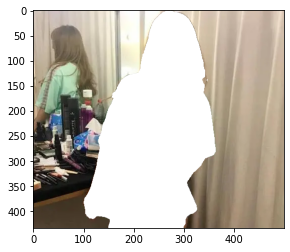

In [22]:

with open("./images/人像分割-自定义人像分割.jpg","wb") as file:
    file.write(base64.b64decode(resp["PortraitImage"]))
face=plt.imread("./images/人像分割-自定义人像分割.jpg")
plt.imshow(face)  